# COMP30027 ML Project 2

### 0. Preparation

#### 0.1 Import libraries and load data

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier

from scipy import stats

# Load dataset
test_dataset = pd.read_csv(r'project_data/test_dataset.csv')
train_dataset = pd.read_csv(r'project_data/train_dataset.csv')

# Load countvec features
cv_test_actor_1_name = np.load(r'project_data/features_countvec/test_countvec_features_actor_1_name.npy')
cv_test_actor_2_name = np.load(r'project_data/features_countvec/test_countvec_features_actor_2_name.npy')
cv_test_director_name = np.load(r'project_data/features_countvec/test_countvec_features_director_name.npy')
cv_train_actor_1_name = np.load(r'project_data/features_countvec/train_countvec_features_actor_1_name.npy')
cv_train_actor_2_name = np.load(r'project_data/features_countvec/train_countvec_features_actor_2_name.npy')
cv_train_director_name = np.load(r'project_data/features_countvec/train_countvec_features_director_name.npy')

# Load doc2vec features
d2v_test_genre = np.load(r'project_data/features_doc2vec/test_doc2vec_features_genre.npy')
d2v_test_plot_keywords = np.load(r'project_data/features_doc2vec/test_doc2vec_features_plot_keywords.npy')
d2v_train_genre = np.load(r'project_data/features_doc2vec/train_doc2vec_features_genre.npy')
d2v_train_plot_keywords = np.load(r'project_data/features_doc2vec/train_doc2vec_features_plot_keywords.npy')

# Load fasttext features
ft_test_title_embedding = np.load(r'project_data/features_fasttext/test_fasttext_title_embeddings.npy')
ft_train_title_embedding = np.load(r'project_data/features_fasttext/train_fasttext_title_embeddings.npy')

#### 0.2 Inspection

In [183]:
# Split a temporary dataset for inspection
inspection = train_dataset.drop(columns=[
    'id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title',
    'title_embedding', 'genres', 'country', 'content_rating', 'plot_keywords', 'language'
])
inspection.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3.004000e+03,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,165.609188,110.076565,778.890146,767.860186,7654.935752,5.187733e+07,1.049017e+05,11391.643808,1.380826,335.922770,2002.782956,1992.843209,8972.179427,0.001739,2.250333
std,121.254549,21.910608,2990.741946,1901.991202,16488.761947,6.840156e+07,1.508573e+05,20044.723195,2.093417,415.219466,10.086250,4651.072554,19853.888300,0.001183,0.691451
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,1929.000000,0.000000,0.000000,0.000300,0.000000
25%,76.000000,96.000000,10.000000,191.000000,728.500000,8.579684e+06,1.897825e+04,1873.000000,0.000000,108.000000,1999.000000,377.750000,0.000000,0.000825,2.000000
50%,137.000000,106.000000,62.500000,433.000000,1000.000000,3.020586e+07,5.387400e+04,3889.000000,1.000000,208.000000,2004.000000,664.000000,241.000000,0.001426,2.000000
75%,223.000000,120.000000,234.000000,683.000000,12000.000000,6.647359e+07,1.284895e+05,15925.250000,2.000000,398.000000,2010.000000,970.000000,11000.000000,0.002401,3.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,6.586723e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,197000.000000,0.007354,4.000000


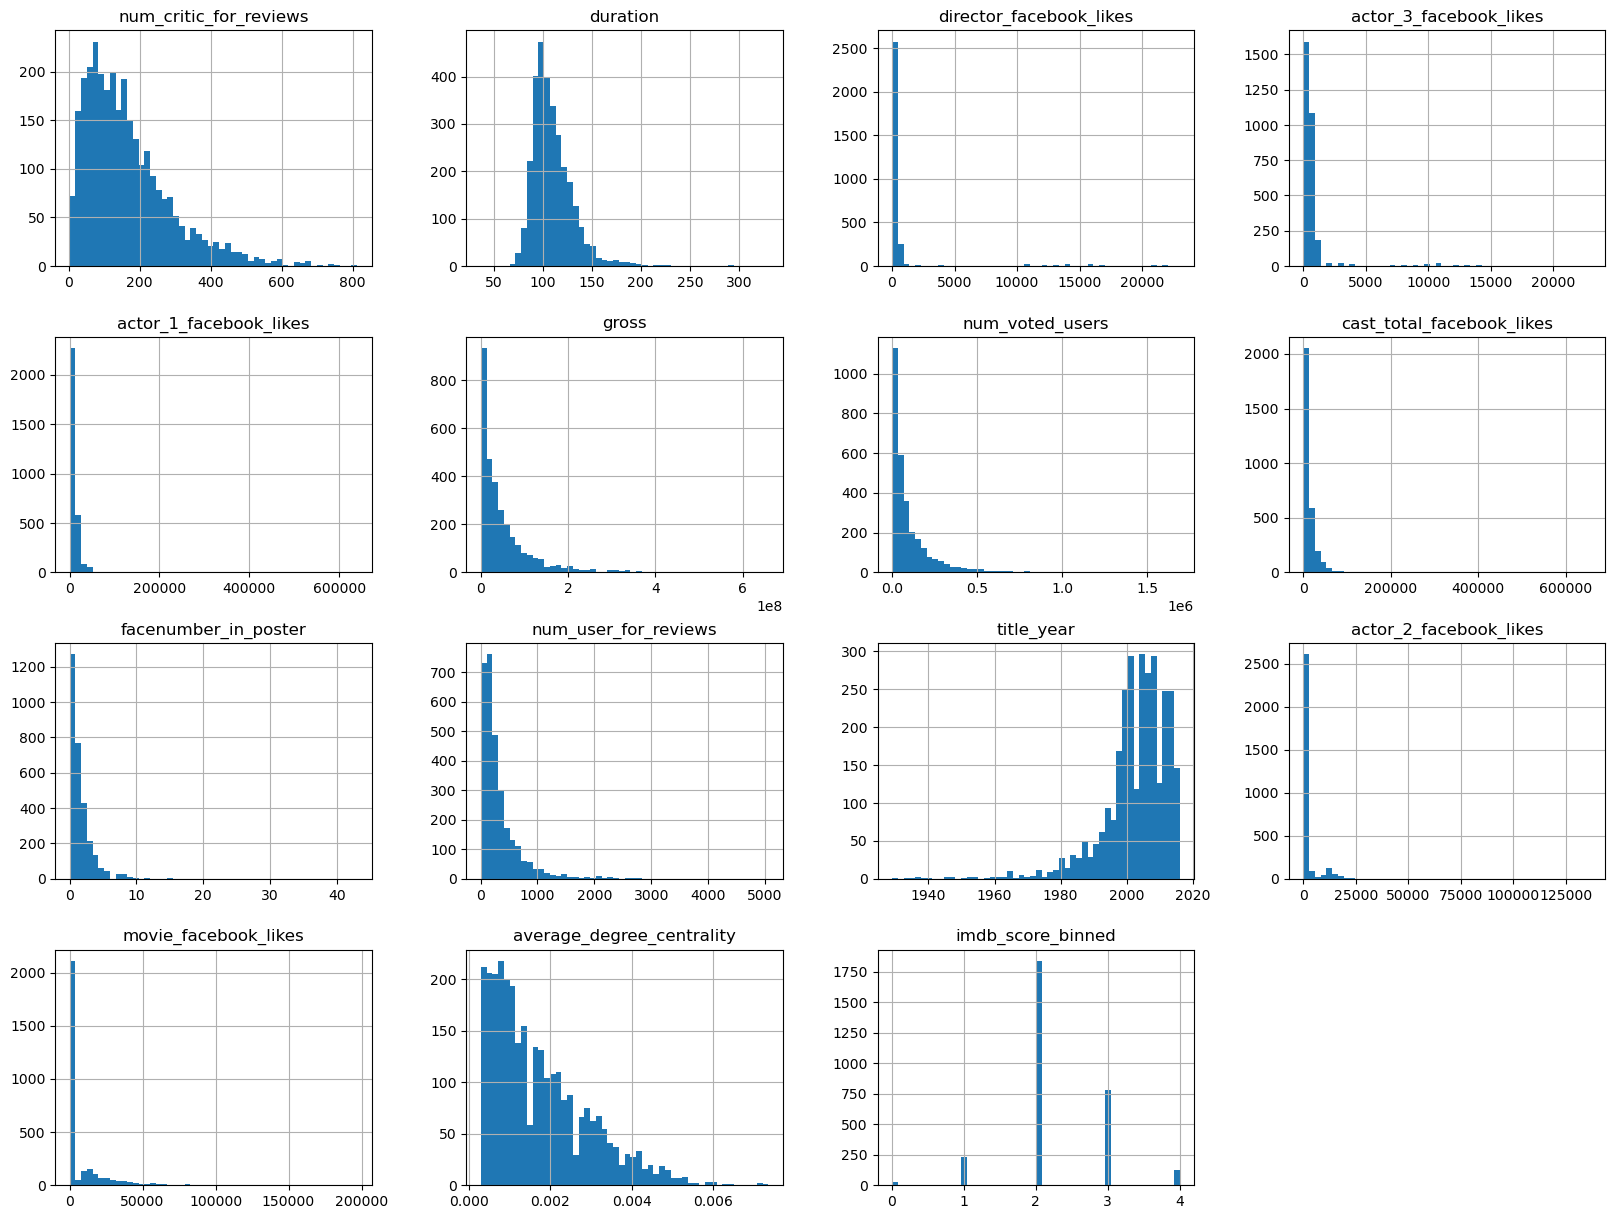

In [184]:
# Histograms
inspection.hist(bins=50, figsize=(20,15))
plt.show()

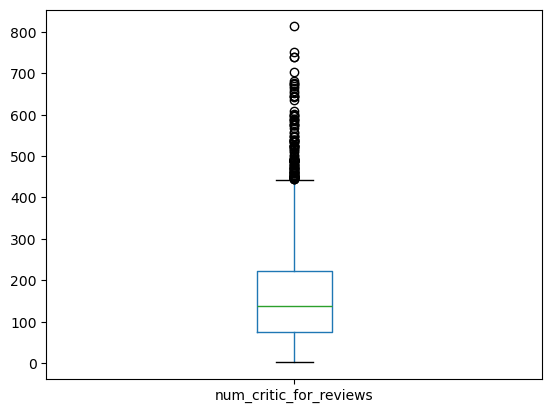

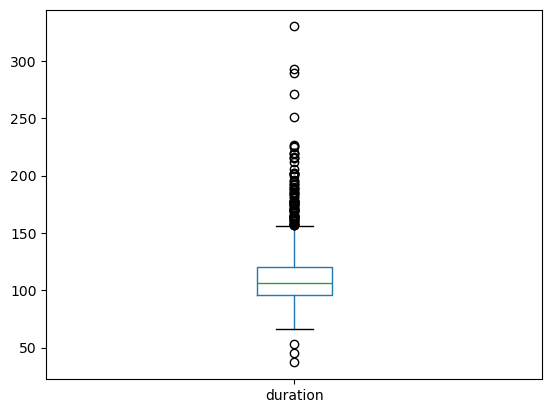

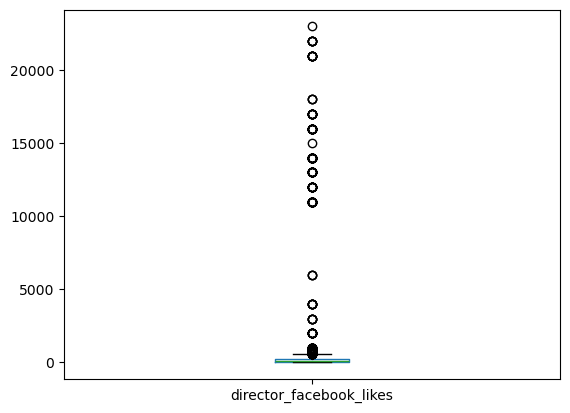

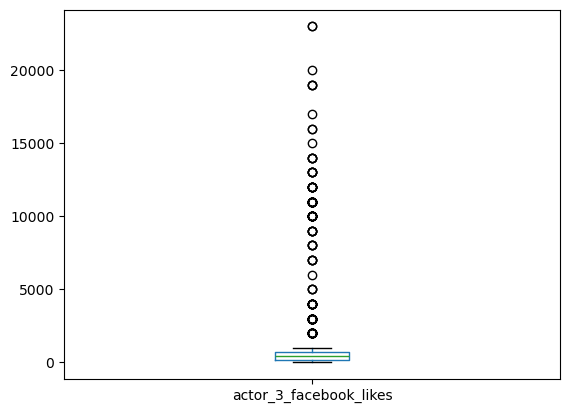

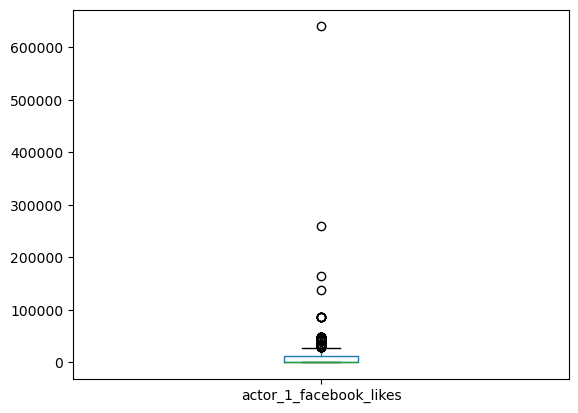

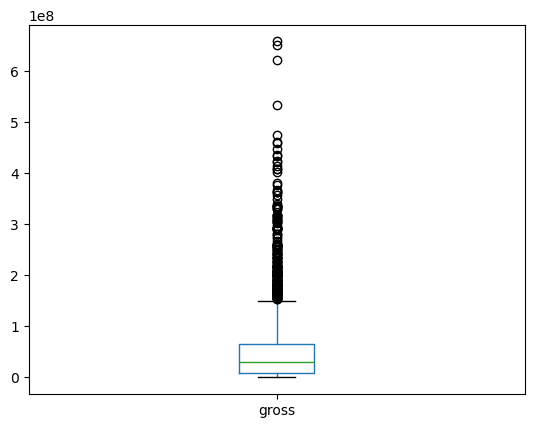

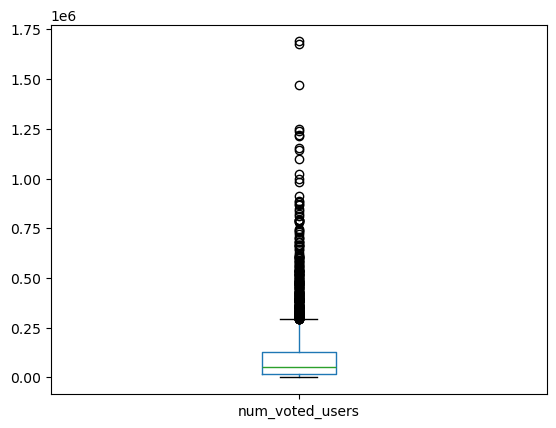

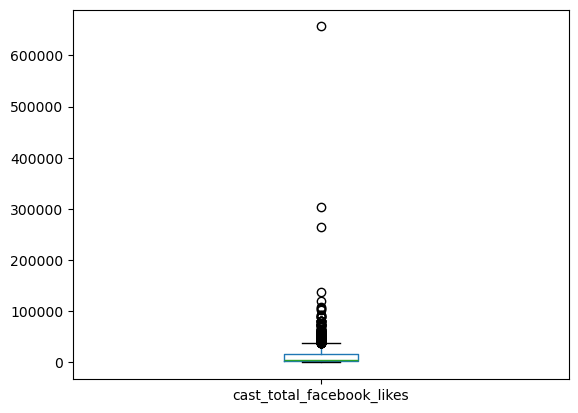

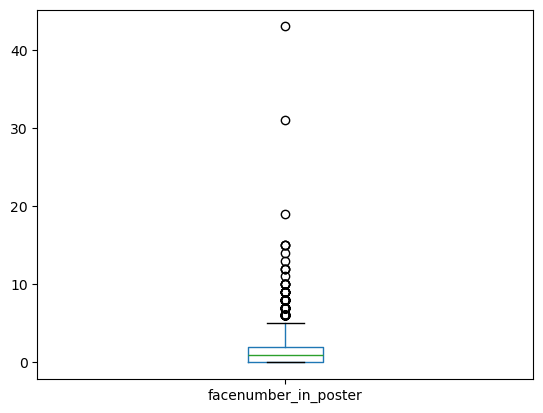

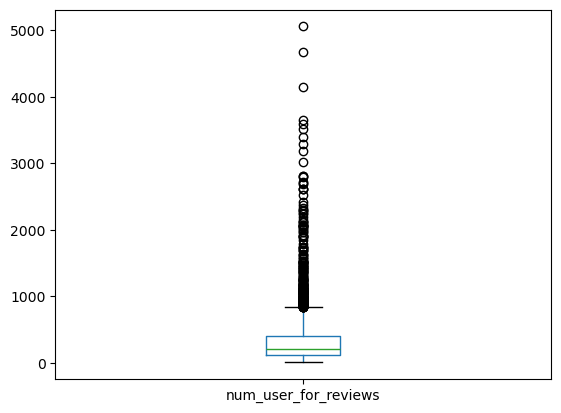

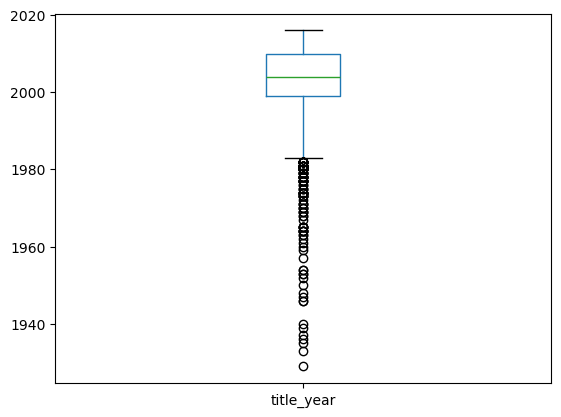

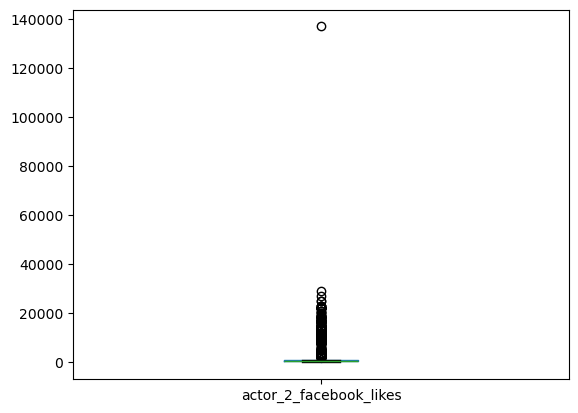

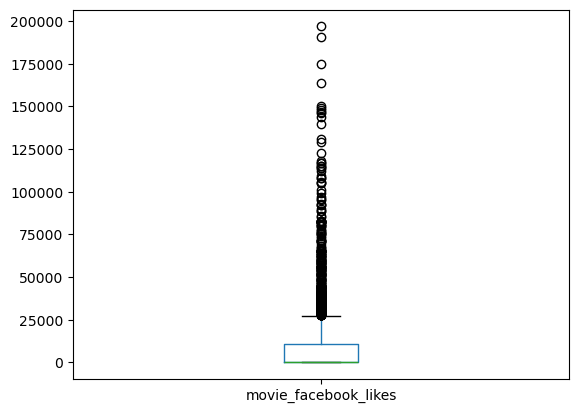

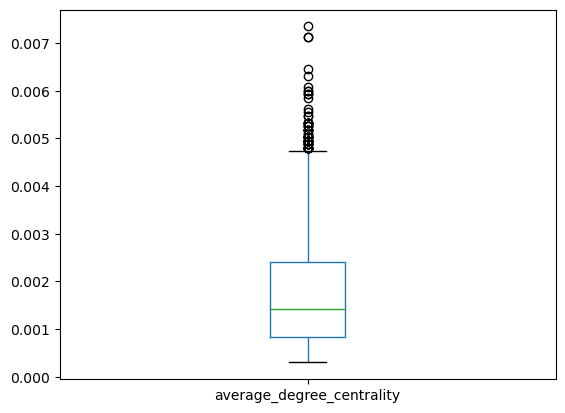

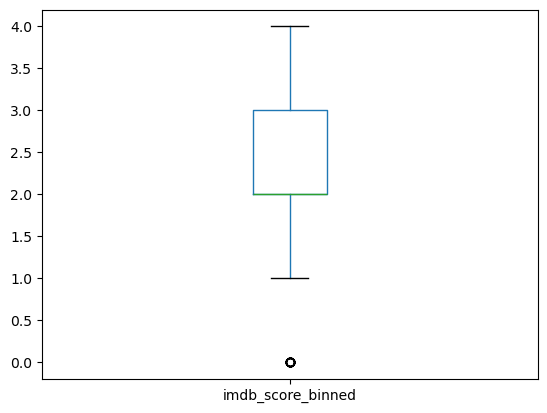

In [185]:
# Boxplots
for col in inspection.columns:
    inspection.boxplot(column=[col])
    plt.grid(False)
    plt.show()

In [186]:
# Correlation matrix
corr_matrix = inspection.corr()
print(corr_matrix)

                           num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.233593   
duration                                 0.233593  1.000000   
director_facebook_likes                  0.173238  0.175870   
actor_3_facebook_likes                   0.250428  0.124426   
actor_1_facebook_likes                   0.156197  0.079785   
gross                                    0.459377  0.266438   
num_voted_users                          0.580511  0.345424   
cast_total_facebook_likes                0.225191  0.115516   
facenumber_in_poster                    -0.031220  0.021318   
num_user_for_reviews                     0.547682  0.360218   
title_year                               0.417861 -0.127640   
actor_2_facebook_likes                   0.247378  0.124402   
movie_facebook_likes                     0.706790  0.207761   
average_degree_centrality                0.237633  0.252224   
imdb_score_binned                        0.323469  0.34

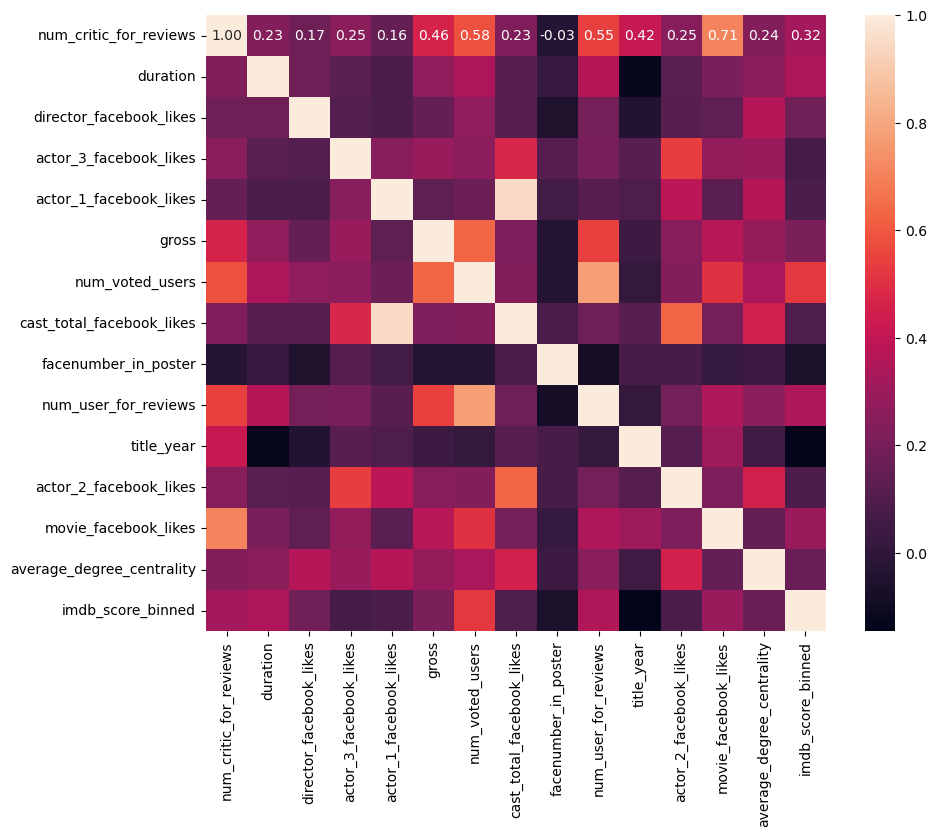

In [187]:
# Heatmap based on correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

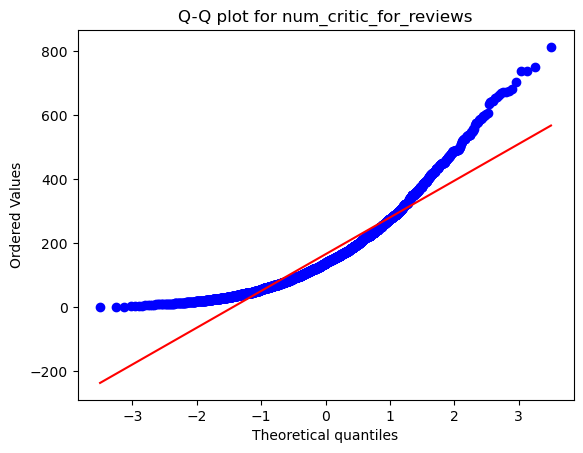

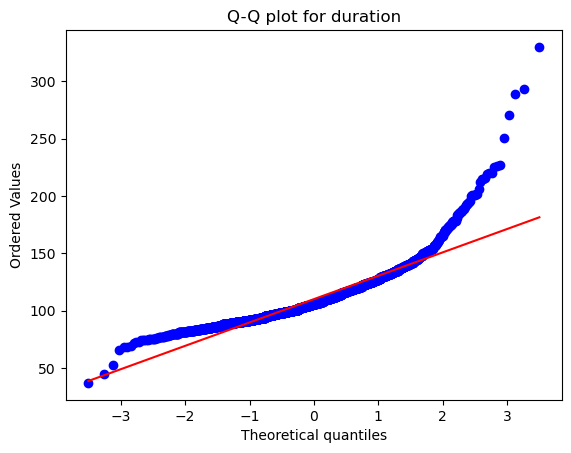

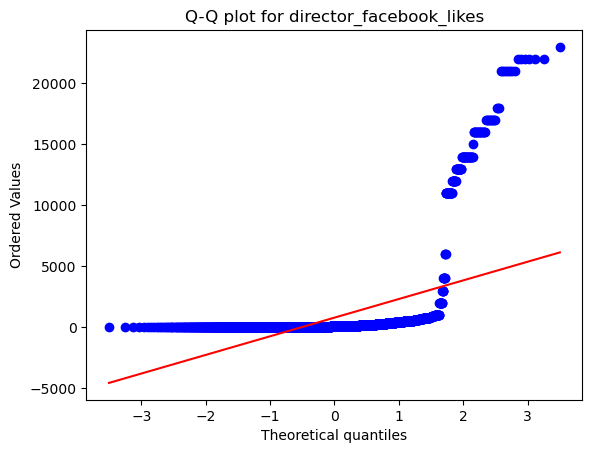

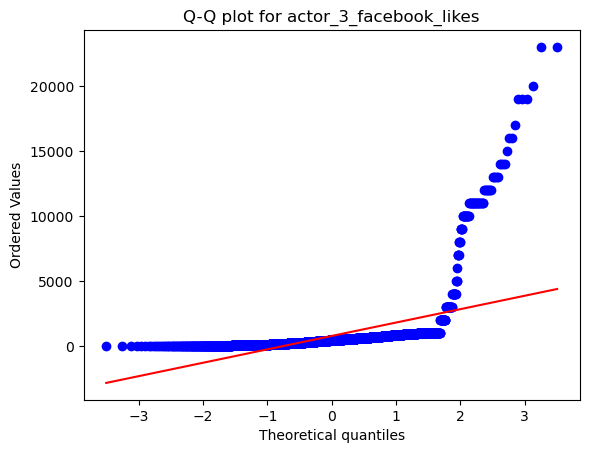

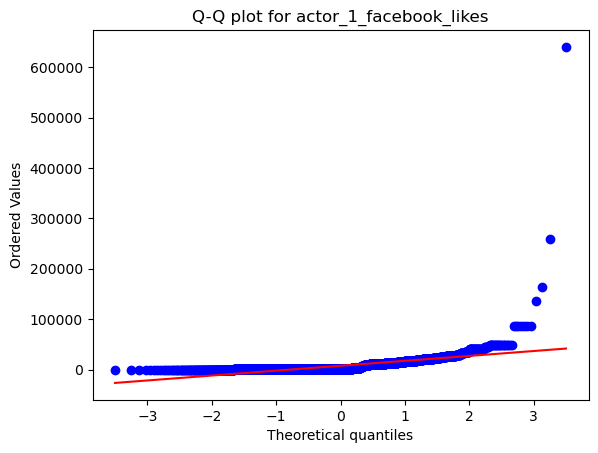

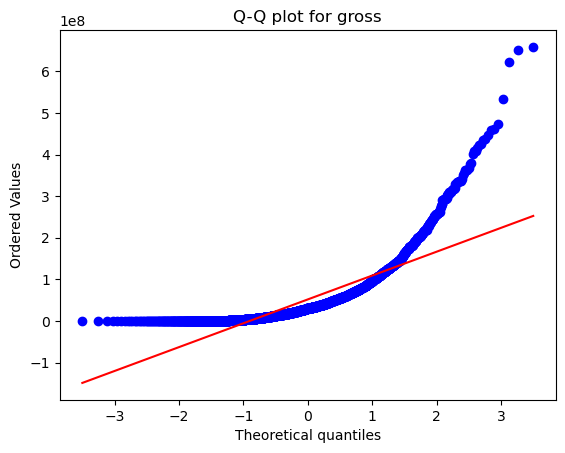

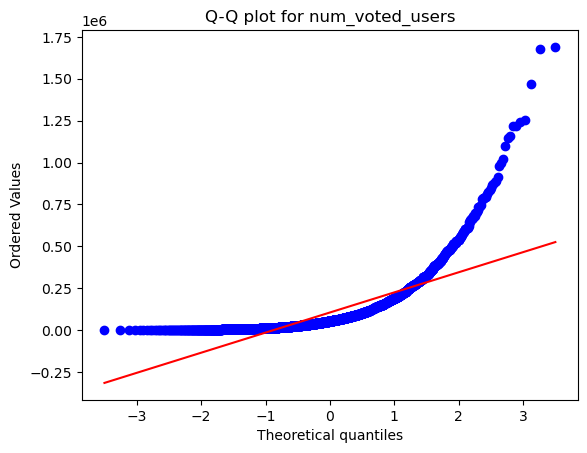

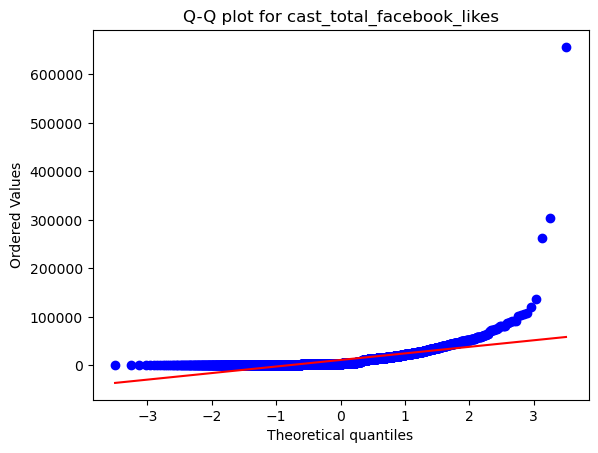

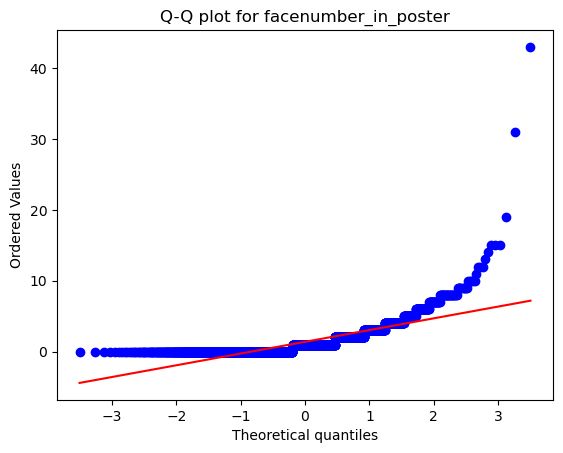

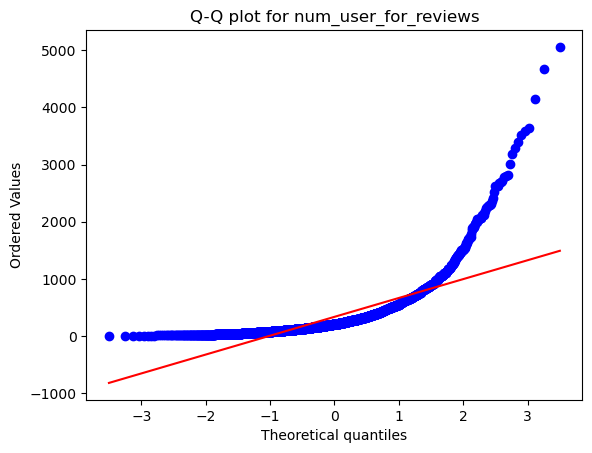

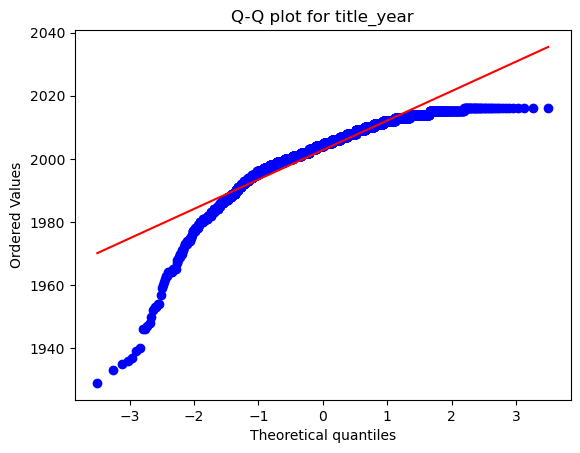

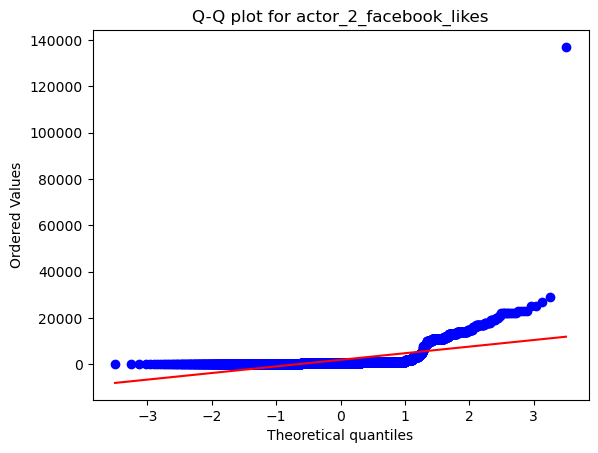

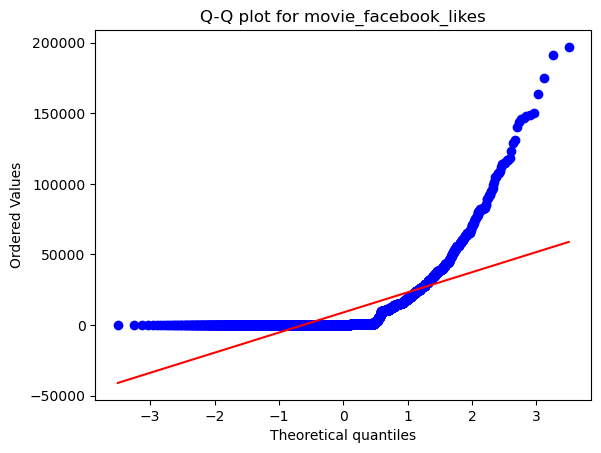

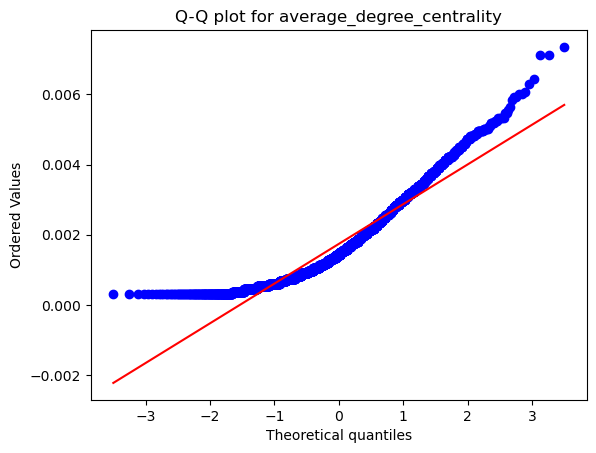

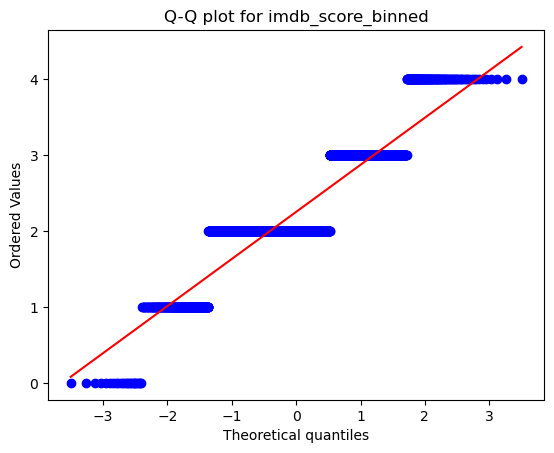

In [188]:
# Q-Q plots
for col in inspection.select_dtypes(include=[np.number]).columns:
    stats.probplot(inspection[col], dist="norm", plot=plt)
    plt.title('Q-Q plot for ' + col)
    plt.show()

### 1. Preprocessing

#### 1.1 Drop text features

Drop text features, id, and format language to a boolean to indicate whether is in English

In [189]:
clean = train_dataset.drop(columns=[
    'id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title',
    'title_embedding', 'genres', 'country', 'content_rating', 'plot_keywords'
])
clean['language'] = (clean['language'] == 'English').astype(int)

#### 1.2 Split features and label

In [190]:
X_train = clean.drop(columns=['imdb_score_binned'])
y_train = clean['imdb_score_binned']

##### 1.7 Normalization

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_dev_scaled = scaler.transform(X_dev)

#### 2. Model fitting

##### 2.1 Decision tree

In [55]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_dev, y_dev)

(1.0, 0.59254327563249)

##### 2.2 Ramdom forest

In [56]:
rf = RandomForestClassifier().fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_dev, y_dev)

(1.0, 0.7163781624500666)

In [57]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

num_voted_users              0.140442
num_user_for_reviews         0.094073
duration                     0.080716
title_year                   0.078517
gross                        0.077359
num_critic_for_reviews       0.074119
director_facebook_likes      0.066736
actor_3_facebook_likes       0.064364
movie_facebook_likes         0.062710
cast_total_facebook_likes    0.058870
actor_2_facebook_likes       0.057125
average_degree_centrality    0.054388
actor_1_facebook_likes       0.053436
facenumber_in_poster         0.025586
language                     0.011560
dtype: float64

<Axes: >

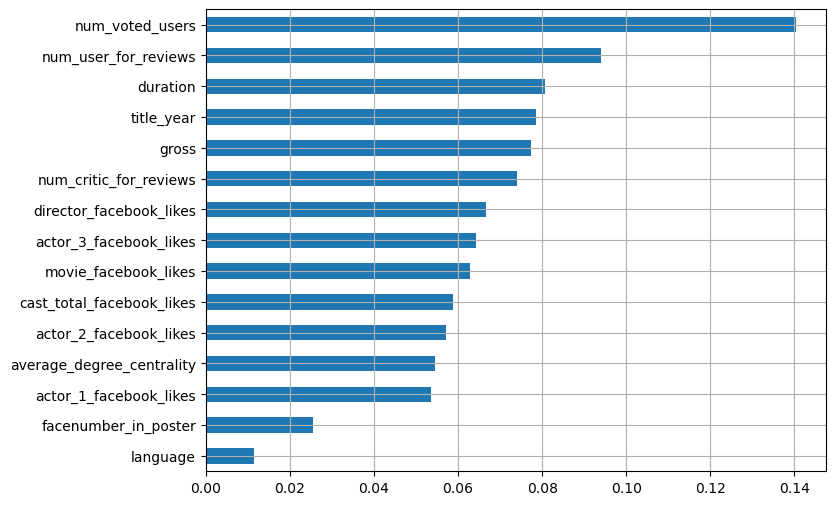

In [58]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values().plot.barh(
    grid=True, figsize=(8,6)
)

##### 2.3 Logistic regression

In [59]:
lr = LogisticRegression(
    max_iter=1000
).fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_dev_scaled, y_dev)

(0.7052818464269862, 0.7017310252996005)

In [60]:
title_train = title_embedding.iloc[X_train.index]
title_dev = title_embedding.iloc[X_dev.index]
title_train.shape, title_dev.shape

((2253, 100), (751, 100))

In [61]:
lr_title = LogisticRegression(
    max_iter=1000
).fit(title_train, y_train)
lr_title.score(title_train, y_train), lr_title.score(title_dev, y_dev)

(0.6120727918331114, 0.6125166444740346)

In [62]:
pd.Series(lr_title.predict(title_train), index=X_train.index)

1779    2
1001    2
1739    2
179     2
2320    2
       ..
1638    2
1095    2
1130    2
1294    2
860     2
Length: 2253, dtype: int64

In [63]:
stack = StackingClassifier([('lr', lr), ('lr_title', lr_title)], final_estimator=LogisticRegression())
stack.fit(X_train_scaled, y_train)
stack.score(X_train_scaled, y_train), stack.score(X_dev_scaled, y_dev)

(0.7079449622725256, 0.7003994673768309)

In [64]:
lr_title.predict(title_train).shape

(2253,)

In [65]:
X_train_scaled.shape

(2253, 15)

In [66]:
X_train_scaled_title = np.column_stack([X_train_scaled, lr_title.predict(title_train)])
X_train_scaled_title

array([[-1.10000386, -0.76989819, -0.24406499, ..., -0.4613248 ,
        -0.40276687,  2.        ],
       [ 1.15227061,  0.29959275, -0.26300911, ...,  1.33249427,
         1.91483333,  2.        ],
       [ 0.24463761, -0.72533607, -0.22512088, ..., -0.4613248 ,
        -0.71595663,  2.        ],
       ...,
       [-0.57055128, -0.01234211, -0.15130415, ..., -0.43082988,
        -0.84123187,  2.        ],
       [ 0.09336545,  0.52240337, -0.26300911, ...,  0.69938166,
         1.28845465,  2.        ],
       [ 0.30346568,  0.78977611, -0.13399315, ..., -0.4613248 ,
        -0.46540533,  2.        ]])

In [67]:
X_dev_scaled_title = np.column_stack([X_dev_scaled, lr_title.predict(title_dev)])
X_dev_scaled_title

array([[-1.1336199 , -1.03727093, -0.24112539, ..., -0.4613248 ,
        -1.21705925,  2.        ],
       [-0.70501543, -0.41340121, -0.25876302, ..., -0.44016829,
        -0.65331818,  2.        ],
       [-1.04957981, -0.68077395, -0.25974288, ..., -0.43336233,
        -0.77859425,  2.        ],
       ...,
       [-0.73863147, -0.36883909, -0.06834199, ..., -0.35580604,
        -0.65331818,  2.        ],
       [-0.46970317, -0.01234211, -0.22806048, ..., -0.4613248 ,
        -0.90387032,  2.        ],
       [-0.62937935,  0.65608974, -0.24798447, ..., -0.4613248 ,
        -1.02914556,  2.        ]])

In [68]:
lr_with_title = LogisticRegression(
    max_iter=1000
).fit(X_train_scaled_title, y_train)
lr_with_title.score(X_train_scaled_title, y_train), lr_with_title.score(X_dev_scaled_title, y_dev)

(0.7052818464269862, 0.7017310252996005)

##### 2.4 MLP

In [69]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 16), early_stopping=True, max_iter=100, random_state=42,
    learning_rate='adaptive', learning_rate_init=0.01
).fit(X_train_scaled, y_train)
mlp.score(X_train_scaled, y_train), mlp.score(X_dev_scaled, y_dev)

(0.7390146471371505, 0.7283621837549934)

In [70]:
mlp.loss_curve_

[1.3907663020361478,
 0.9513019458964034,
 0.8267063791800436,
 0.7703050274761776,
 0.7413494340797813,
 0.7127456553299136,
 0.7054401908214107,
 0.694737096812688,
 0.6825047114170754,
 0.6686191551396525,
 0.6711529806784227,
 0.6641598451459816,
 0.6812243970057763,
 0.6570686587367334,
 0.6467617669615033,
 0.6328063446377494,
 0.6265132107062387,
 0.6280041319658053,
 0.61786011075058,
 0.6011027594220928,
 0.602649912245796,
 0.6063400482097613]

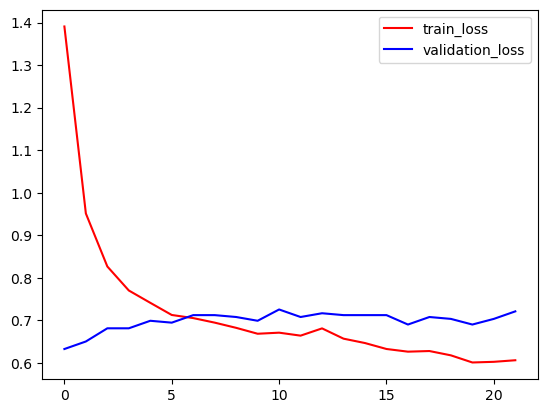

In [71]:
plt.plot(mlp.loss_curve_, color='r', label='train_loss')
plt.plot(mlp.validation_scores_, color='b', label='validation_loss')
plt.legend()

#### 3. Evaluation

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

In [73]:
print(classification_report(y_dev, mlp.predict(X_dev_scaled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      0.02      0.03        57
           2       0.74      0.91      0.82       460
           3       0.69      0.55      0.61       201
           4       0.77      0.63      0.69        27

    accuracy                           0.73       751
   macro avg       0.51      0.42      0.43       751
weighted avg       0.69      0.73      0.69       751



c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
confusion_matrix(y_dev, mlp.predict(X_dev_scaled))

array([[  0,   0,   6,   0,   0],
       [  0,   1,  55,   1,   0],
       [  0,   2, 418,  40,   0],
       [  0,   0,  85, 111,   5],
       [  0,   0,   1,   9,  17]], dtype=int64)

In [75]:
y_dev.value_counts()

imdb_score_binned
2    460
3    201
1     57
4     27
0      6
Name: count, dtype: int64

In [76]:
print(classification_report(y_dev, lr_title.predict(title_dev)))

c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        57
           2       0.61      1.00      0.76       460
           3       0.00      0.00      0.00       201
           4       0.00      0.00      0.00        27

    accuracy                           0.61       751
   macro avg       0.12      0.20      0.15       751
weighted avg       0.38      0.61      0.47       751



c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
confusion_matrix(y_dev, lr_title.predict(title_dev))

array([[  0,   0,   6,   0,   0],
       [  0,   0,  57,   0,   0],
       [  0,   0, 460,   0,   0],
       [  0,   0, 201,   0,   0],
       [  0,   0,  27,   0,   0]], dtype=int64)

In [78]:
print(classification_report(y_dev, lr.predict(X_dev_scaled)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        57
           2       0.71      0.91      0.80       460
           3       0.65      0.44      0.53       201
           4       0.78      0.67      0.72        27

    accuracy                           0.70       751
   macro avg       0.43      0.40      0.41       751
weighted avg       0.64      0.70      0.66       751



c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
confusion_matrix(y_dev, lr.predict(X_dev_scaled))

array([[  0,   0,   6,   0,   0],
       [  0,   0,  57,   0,   0],
       [  0,   1, 420,  39,   0],
       [  0,   0, 107,  89,   5],
       [  0,   0,   1,   8,  18]], dtype=int64)

In [80]:
# uneven class distribution

#### 4. Parameter tuning

##### 4.1 Tune one parameter

In [81]:
from sklearn.model_selection import validation_curve

In [82]:
param_range = np.logspace(-1, 2, 10) # 10 points from 1e-4 to 1e2

train_scores, validation_scores = validation_curve(
    LogisticRegression(max_iter=1000), X_train_scaled, y_train, 
    param_name='C', param_range=param_range, cv=5, n_jobs=-1, verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.1s finished


In [83]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

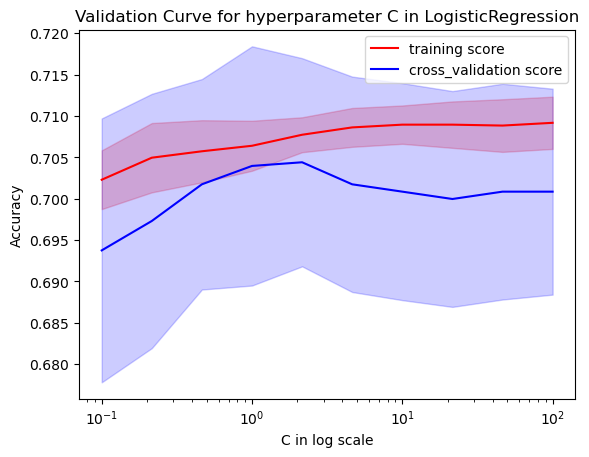

In [84]:
plt.semilogx(param_range, mean_train_scores, label='training score', color='r')
plt.fill_between(param_range, mean_train_scores-std_train_scores, 
                 mean_train_scores+std_train_scores, color='r', 
                 alpha=0.2)

plt.semilogx(param_range, mean_valid_scores, label='cross_validation score', color='b')
plt.fill_between(param_range, mean_valid_scores-std_valid_scores, 
                 mean_valid_scores+std_valid_scores, color='b', 
                 alpha=0.2)

plt.legend(loc='best')

plt.title('Validation Curve for hyperparameter C in LogisticRegression')
plt.xlabel('C in log scale')
plt.ylabel('Accuracy')
plt.show()

In [85]:
mean_valid_scores

array([0.69374723, 0.69730081, 0.7017354 , 0.70395467, 0.70439714,
       0.70173245, 0.70084651, 0.69995861, 0.70084651, 0.70084553])

In [86]:
param_range

array([  0.1       ,   0.21544347,   0.46415888,   1.        ,
         2.15443469,   4.64158883,  10.        ,  21.5443469 ,
        46.41588834, 100.        ])

In [87]:
# refit using best hyperparameter
lr = LogisticRegression(C=2, max_iter=1000).fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train), lr.score(X_dev_scaled, y_dev)

(0.7061695517088327, 0.7017310252996005)

In [88]:
param_range = np.logspace(-4, 10, 10) # 10 points from 1e-4 to 1e2

train_scores, validation_scores = validation_curve(
    LinearSVC(), X_train_scaled, y_train, 
    param_name='C', param_range=param_range, cv=5, n_jobs=-1, verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.8s finished


In [89]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

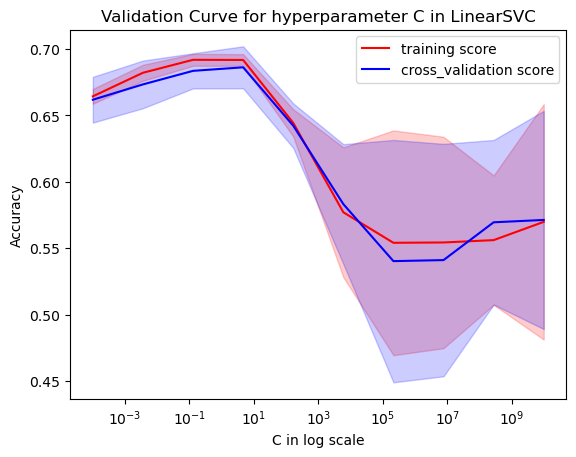

In [90]:
plt.semilogx(param_range, mean_train_scores, label='training score', color='r')
plt.fill_between(param_range, mean_train_scores-std_train_scores, 
                 mean_train_scores+std_train_scores, color='r', 
                 alpha=0.2)

plt.semilogx(param_range, mean_valid_scores, label='cross_validation score', color='b')
plt.fill_between(param_range, mean_valid_scores-std_valid_scores, 
                 mean_valid_scores+std_valid_scores, color='b', 
                 alpha=0.2)

plt.legend(loc='best')

plt.title('Validation Curve for hyperparameter C in LinearSVC')
plt.xlabel('C in log scale')
plt.ylabel('Accuracy')
plt.show()

##### 4.2 Grid-search

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [92]:
pipeline = Pipeline(
    [
        ('clf', RandomForestClassifier(random_state=42))
    ]
)

In [93]:
parameters = {
    'clf__max_depth': (5, 10, None), # Every tree's depth
    'clf__n_estimators': (100, 200, 500, 1000), # Number of trees
    # 'clf__max_features': ('sqrt', 'log', None) # Number of features
}

In [94]:
gs = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2, cv=5).fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [95]:
mean_score = gs.cv_results_['mean_test_score']
param_set = gs.cv_results_['params']

In [96]:
mean_score

array([0.68974427, 0.68797142, 0.68752796, 0.68797044, 0.70749544,
       0.70749446, 0.70838137, 0.70749938, 0.71414831, 0.71592412,
       0.71992412, 0.71592905])

In [100]:
param_set

[{'clf__max_depth': 5, 'clf__n_estimators': 100},
 {'clf__max_depth': 5, 'clf__n_estimators': 200},
 {'clf__max_depth': 5, 'clf__n_estimators': 500},
 {'clf__max_depth': 5, 'clf__n_estimators': 1000},
 {'clf__max_depth': 10, 'clf__n_estimators': 100},
 {'clf__max_depth': 10, 'clf__n_estimators': 200},
 {'clf__max_depth': 10, 'clf__n_estimators': 500},
 {'clf__max_depth': 10, 'clf__n_estimators': 1000},
 {'clf__max_depth': None, 'clf__n_estimators': 100},
 {'clf__max_depth': None, 'clf__n_estimators': 200},
 {'clf__max_depth': None, 'clf__n_estimators': 500},
 {'clf__max_depth': None, 'clf__n_estimators': 1000}]

In [99]:
pd.Series(mean_score).sort_values()

2     0.687528
3     0.687970
1     0.687971
0     0.689744
5     0.707494
4     0.707495
7     0.707499
6     0.708381
8     0.714148
9     0.715924
11    0.715929
10    0.719924
dtype: float64

In [101]:
param_set[10]

{'clf__max_depth': None, 'clf__n_estimators': 500}

In [104]:
param_set[mean_score.argsort()[-1]]

{'clf__max_depth': None, 'clf__n_estimators': 500}

In [105]:
parameters = {
    'clf__max_depth': (5, 10, None), # Every tree's depth
    'clf__n_estimators': (100, 200, 500, 1000), # Number of trees
    'clf__max_features': ('sqrt', 'log', None) # Number of features
}

In [106]:
gs = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2, cv=3).fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\cxlan\Anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "c:\Users\cxlan\Anaconda3\

In [107]:
mean_score = gs.cv_results_['mean_test_score']
param_set = gs.cv_results_['params']

In [108]:
mean_score

array([0.68797159, 0.68530848, 0.68575233, 0.68486462,        nan,
              nan,        nan,        nan, 0.69063471, 0.69063471,
       0.69196627, 0.69107856, 0.70128717, 0.70261873, 0.69995561,
       0.70261873,        nan,        nan,        nan,        nan,
       0.70616955, 0.71016423, 0.70838881, 0.71193964, 0.70439414,
       0.70306258, 0.70616955, 0.70705726,        nan,        nan,
              nan,        nan, 0.70838881, 0.70883267, 0.71149578,
       0.71460275])

In [109]:
param_set

[{'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 100},
 {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200},
 {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 500},
 {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__n_estimators': 1000},
 {'clf__max_depth': 5, 'clf__max_features': 'log', 'clf__n_estimators': 100},
 {'clf__max_depth': 5, 'clf__max_features': 'log', 'clf__n_estimators': 200},
 {'clf__max_depth': 5, 'clf__max_features': 'log', 'clf__n_estimators': 500},
 {'clf__max_depth': 5, 'clf__max_features': 'log', 'clf__n_estimators': 1000},
 {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 100},
 {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 200},
 {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 500},
 {'clf__max_depth': 5, 'clf__max_features': None, 'clf__n_estimators': 1000},
 {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__n_

In [117]:
pd.Series(mean_score).fillna(0).sort_values(ascending=False)

35    0.714603
23    0.711940
34    0.711496
21    0.710164
33    0.708833
32    0.708389
22    0.708389
27    0.707057
26    0.706170
20    0.706170
24    0.704394
25    0.703063
15    0.702619
13    0.702619
12    0.701287
14    0.699956
10    0.691966
11    0.691079
8     0.690635
9     0.690635
0     0.687972
2     0.685752
1     0.685308
3     0.684865
19    0.000000
17    0.000000
16    0.000000
7     0.000000
6     0.000000
5     0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
4     0.000000
18    0.000000
dtype: float64

In [120]:
param_set[35]

{'clf__max_depth': None, 'clf__max_features': None, 'clf__n_estimators': 1000}

##### 4.3 Learning curve

In [121]:
from sklearn.model_selection import learning_curve

In [122]:
train_size, train_scores, validation_scores = learning_curve(
    LogisticRegression(C=2, max_iter=1000), X_train_scaled, y_train,
    train_sizes=np.linspace(0.1, 1, 5), cv=5, n_jobs=-1, verbose=1
)

[learning_curve] Training set sizes: [ 180  585  991 1396 1802]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.5s finished


In [123]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

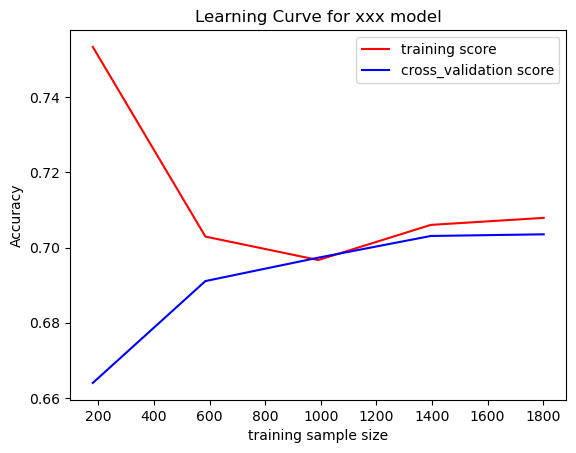

In [125]:
plt.plot(train_size, mean_train_scores, label='training score', color='r')
# plt.fill_between(train_size, mean_train_scores-std_train_scores, 
#                  mean_train_scores+std_train_scores, color='r', 
#                  alpha=0.2)

plt.plot(train_size, mean_valid_scores, label='cross_validation score', color='b')
# plt.fill_between(train_size, mean_valid_scores-std_valid_scores, 
#                  mean_valid_scores+std_valid_scores, color='b', 
#                  alpha=0.2)

plt.legend(loc='best')

plt.title('Learning Curve for xxx model')
plt.xlabel('training sample size')
plt.ylabel('Accuracy')
plt.show()

In [127]:
train_size, train_scores, validation_scores = learning_curve(
    RandomForestClassifier(n_estimators=1000), 
    clean.drop(columns=['imdb_score_binned']), clean['imdb_score_binned'],
    train_sizes=np.linspace(0.1, 1, 10), cv=5, n_jobs=-1, verbose=1
)

[learning_curve] Training set sizes: [ 240  480  720  961 1201 1441 1682 1922 2162 2403]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.0min finished


In [128]:
mean_train_scores = np.mean(train_scores, axis=1)
std_train_scores = np.std(train_scores, axis=1)
mean_valid_scores = np.mean(validation_scores, axis=1)
std_valid_scores = np.std(validation_scores, axis=1)

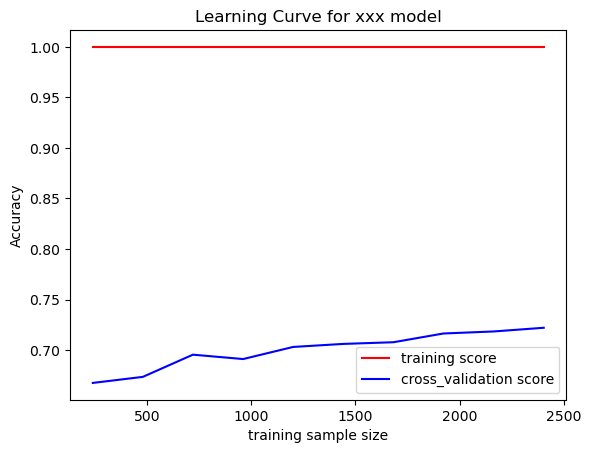

In [129]:
plt.plot(train_size, mean_train_scores, label='training score', color='r')
# plt.fill_between(train_size, mean_train_scores-std_train_scores, 
#                  mean_train_scores+std_train_scores, color='r', 
#                  alpha=0.2)

plt.plot(train_size, mean_valid_scores, label='cross_validation score', color='b')
# plt.fill_between(train_size, mean_valid_scores-std_valid_scores, 
#                  mean_valid_scores+std_valid_scores, color='b', 
#                  alpha=0.2)

plt.legend(loc='best')

plt.title('Learning Curve for xxx model')
plt.xlabel('training sample size')
plt.ylabel('Accuracy')
plt.show()